# Swim Fonts

### Imports and Global Variables

In [101]:
import string
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FONT_PATH='/data/udel-ms-data-science/math-637/project-1/char-fonts/raw'
FONT_EXTENSION='csv'
FONTS=['courier']
ROW_COLS=[f'r{r}c{c}' for r in range(20) for c in range(20)]
LABEL_COL='m_label'
KEEP_COLS=[LABEL_COL, *ROW_COLS]

_UPPER_LOWER=string.ascii_letters
_NUMERALS='0123456789'
_ULN=_UPPER_LOWER+_NUMERALS

ULN=[ord(x) for x in _ULN]

### Import Utility Modules
#### Takes forever to load single item...So, read raw csv into dataframe and prune

In [2]:
import font_utils.trim_raw_fonts as TRF

### Read Font Into DataFrame

In [4]:
trf = TRF.TrimRawFonts(f'{FONT_PATH}/{FONTS[0]}.{FONT_EXTENSION}')

In [5]:
courier_df = trf.load_font_dataframe()

In [7]:
courier_df.shape

(1145, 400)

In [8]:
courier_df.head()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
48,1,9,14,15,45,87,134,186,226,232,...,162,150,120,99,80,61,34,26,22,22
51,1,3,21,46,67,128,178,213,234,241,...,184,184,166,139,116,83,64,45,30,23
78,255,255,255,255,255,255,171,1,1,1,...,1,1,1,1,1,255,255,255,86,1
49,20,28,36,44,75,88,113,152,198,218,...,158,152,152,152,158,170,180,167,151,132
57,28,31,45,70,136,184,215,227,235,236,...,70,60,55,40,32,30,19,25,28,28


### Read Raw Font File

In [10]:
cdf = pd.read_csv(f'{FONT_PATH}/{FONTS[0]}.{FONT_EXTENSION}')

In [11]:
cdf.shape

(12229, 412)

#### Columns

In [13]:
cdf.columns

Index(['font', 'fontVariant', 'm_label', 'strength', 'italic', 'orientation',
       'm_top', 'm_left', 'originalH', 'originalW',
       ...
       'r19c10', 'r19c11', 'r19c12', 'r19c13', 'r19c14', 'r19c15', 'r19c16',
       'r19c17', 'r19c18', 'r19c19'],
      dtype='object', length=412)

#### Filter Unwanted Entries
1. Select on font column = COURIER
1. Select only a-zA-Z0-9
    1. a-z ord values range inclusive: 97,...,122
    1. A-Z ord values range inclusive: 65,...,90
    1. 0-9 ord values range inclusive: 48,...,57
1. Select on fontVariant column = scanned
1. Select on italic column = 0

In [53]:
letters_numbers = cdf.loc[
    (cdf['font'] == 'COURIER') &
    (
        ( (cdf['m_label'] > 96) & (cdf['m_label'] < 123) ) | # lower case a-z
        ( (cdf['m_label'] > 64) & (cdf['m_label'] < 91)  ) | # upper case A-Z
        ( (cdf['m_label'] > 47) & (cdf['m_label'] < 58)  )   # numerals 0-9
    ) &
    (cdf['fontVariant'] == 'scanned') & 
    (cdf['italic'] == 0)
]

#### Check Frequency Of Each Letter
1. Should have 62 unique entries
1. 0-9 characters have much greater frequency
    1. Sample numeric characters to match basic frequency of letters
    1. Figure out the smallest entry of letters and use that to build up sample

In [56]:
letters_numbers.m_label.value_counts()

48     87
54     67
49     64
56     52
51     51
       ..
99      6
98      6
84      6
122     6
89      5
Name: m_label, Length: 62, dtype: int64

<AxesSubplot:>

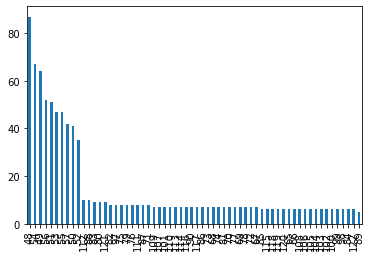

In [55]:
letters_numbers.m_label.value_counts().plot.bar()

#### Remove Unwanted Columns

In [61]:
less_cols = letters_numbers[KEEP_COLS]

### Create Sample Of Font
1. Which character has minimum versions
1. Random sample the list of indices for each character with that min
1. Flatten the list of lists into single list
1. Pull those rows from cleaned dataframe

In [69]:
min_char_count = min(less_cols.m_label.value_counts())
random.sample(less_cols.index[less_cols['m_label'] == 48].tolist(), min_char_count)

[801, 990, 871, 887, 964]

In [95]:
to_flatten = [random.sample(less_cols.index[less_cols['m_label'] == c].tolist(), min_char_count) for c in ULN]

In [94]:
flat_idx = [item for sublist in to_flatten for item in sublist]

In [96]:
pca_candidate = less_cols[less_cols.index.isin(flat_idx)]

In [97]:
pca_candidate

,m_label,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
4,78,255,255,255,255,255,255,171,1,1,...,1,1,1,1,1,255,255,255,86,1
8,68,1,1,1,1,255,255,255,255,255,...,255,255,255,86,1,1,1,1,1,1
10,50,10,11,16,25,43,65,98,143,189,...,140,134,134,140,143,143,134,140,129,101
11,103,1,1,1,1,99,255,255,255,255,...,255,255,255,216,1,1,1,1,1,1
14,113,1,1,1,1,1,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,85,255,255,255,255,255,255,171,1,1,...,255,255,255,86,1,1,1,1,1,1
1104,104,1,1,1,1,1,140,255,255,255,...,1,1,70,255,255,255,255,255,255,255
1110,118,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1112,111,1,1,1,1,1,1,1,1,1,...,255,255,186,1,1,1,1,1,1,1


### Plot A Few Characters

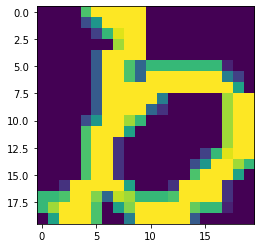

In [112]:
char_ar = np.array(pca_candidate.iloc[10], dtype=np.uint8)
plt.imshow(char_ar[1:].reshape(20,20), interpolation='nearest')
plt.show()

In [113]:
pca_candidate.iloc[10]

m_label    98
r0c0        1
r0c1        1
r0c2        1
r0c3        1
           ..
r19c15      1
r19c16      1
r19c17      1
r19c18      1
r19c19      1
Name: 29, Length: 401, dtype: int64